# Sugarcane Data Analysis

## Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('Dataset/List of Countries by Sugarcane Production.csv')
df.head(10)

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879
5,5,Mexico,North America,56.446.821,452524,781.054,72.27
6,6,Colombia,South America,36.951.213,740075,416.626,"88.691,5"
7,7,Australia,Oceania,34.403.004,"1.373,406",447.204,"76.929,1"
8,8,Guatemala,North America,33.533.403,"1.938,114",259.85,"129.049,3"
9,9,United States of America,North America,29.926.210,91304,370.53,80.766


In [3]:
df.sample(10)

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
56,56,Sri Lanka,Asia,747.907,34877,16.751,"44.647,8"
61,61,Burkina Faso,Africa,484.872,23951,4.823,"100.526,3"
52,52,Ethiopia,Africa,1.410.312,13115,31.237,"45.148,8"
8,8,Guatemala,North America,33.533.403,"1.938,114",259.85,"129.049,3"
43,43,Guyana,South America,2.394.553,"3.061,207",44.311,"54.039,7"
18,18,Peru,South America,9.832.526,314768,87.696,"112.120,2"
33,33,Costa Rica,North America,4.158.370,83111,69.03,60.24
36,36,Zimbabwe,Africa,3.483.000,234563,43.5,80.069
84,84,Afghanistan,Asia,17.364,55,1.333,"13.026,3"
59,59,Cambodia,Asia,610.878,38014,27.387,"22.305,5"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  103 non-null    int64 
 1   Country                     103 non-null    object
 2   Continent                   103 non-null    object
 3   Production (Tons)           103 non-null    object
 4   Production per Person (Kg)  103 non-null    object
 5   Acreage (Hectare)           102 non-null    object
 6   Yield (Kg / Hectare)        102 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


In [5]:
df.isnull().sum()

Unnamed: 0                    0
Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             1
Yield (Kg / Hectare)          1
dtype: int64

In [6]:
df=df.fillna('0')

In [7]:
df[df['Yield (Kg / Hectare)'].isna()]

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)


In [8]:
df['Production (Tons)']=df['Production (Tons)'].str.replace('.','')
df['Acreage (Hectare)']=df['Acreage (Hectare)'].str.replace('.','')
df['Production per Person (Kg)']=df['Production per Person (Kg)'].str.replace('.','').str.replace(',','.')
df['Yield (Kg / Hectare)']=df['Yield (Kg / Hectare)'].str.replace('.','').str.replace(',','.')

df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [9]:
df=df.rename(columns={'Production (Tons)':'Production(Tons)','Production per Person (Kg)':'Production_per_person(Kg)','Acreage (Hectare)':'Acreage(Hectare)','Yield (Kg / Hectare)':'Yield(Kg/Hectare)'})

In [10]:
df.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [11]:
df=df.drop('Unnamed: 0',axis=1)

In [12]:
df

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...
98,Lebanon,Asia,97,16,3,28386.4
99,Djibouti,Africa,53,51,0,0
100,Singapore,Asia,50,9,2,25
101,Samoa,Oceania,12,6,1,11949.8


In [13]:
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

In [14]:

df[['Production(Tons)','Production_per_person(Kg)','Acreage(Hectare)','Yield(Kg/Hectare)']]=df[['Production(Tons)','Production_per_person(Kg)','Acreage(Hectare)','Yield(Kg/Hectare)']].astype('float')


In [15]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

## Univariate Analysis

In [16]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


### How many countries in each Continent

In [17]:
df['Continent'].value_counts()

Continent
Africa           39
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

### List of countries in each continent

In [18]:
df_count=df.groupby('Continent')['Country'].value_counts()

In [19]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


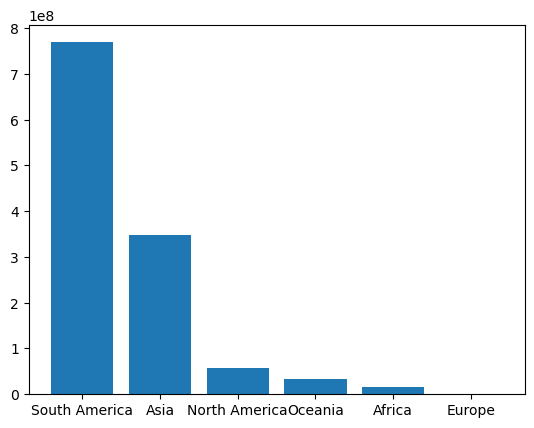

In [20]:
plt.bar(df['Continent'],df['Production(Tons)'])
plt.show()

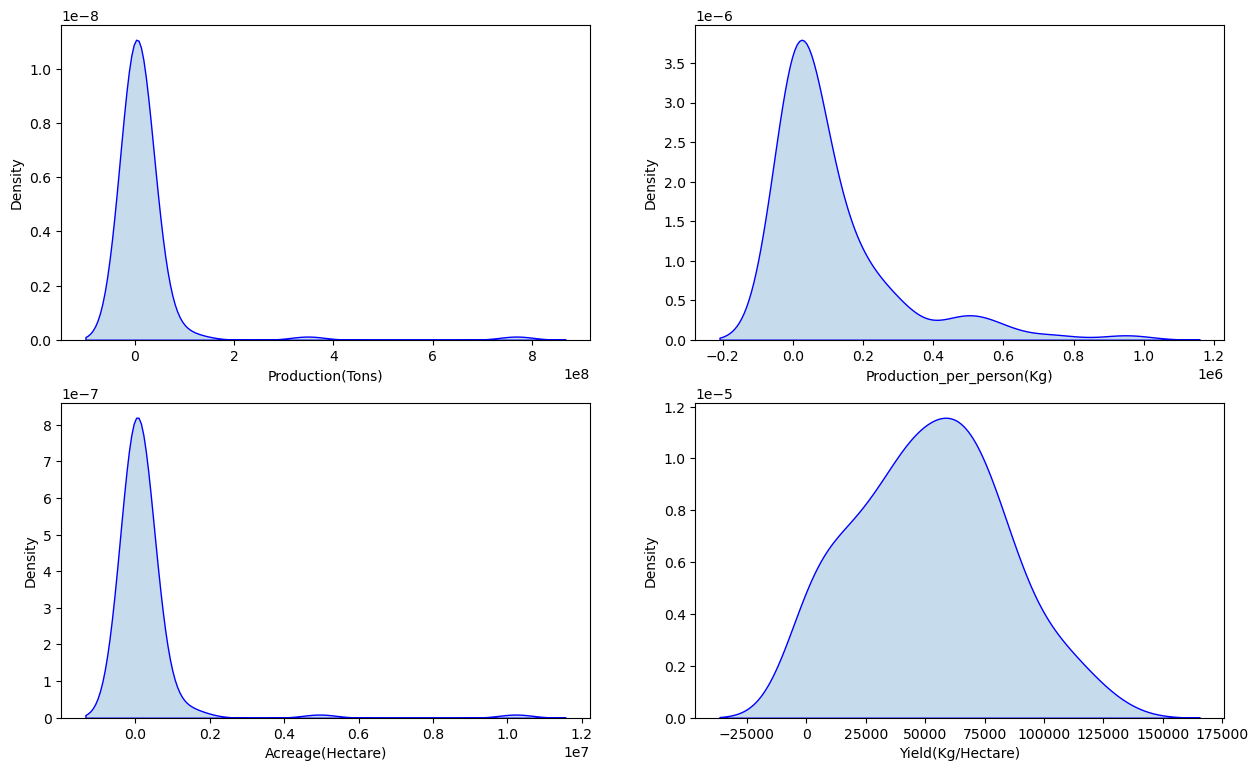

In [21]:
plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
sns.kdeplot(data=df,x=df['Production(Tons)'],fill=True,edgecolor='blue')
plt.subplot(2,2,2)
sns.kdeplot(data=df,x=df['Production_per_person(Kg)'],fill=True,edgecolor='blue')
plt.subplot(2,2,3)
sns.kdeplot(data=df,x=df['Acreage(Hectare)'],fill=True,edgecolor='blue')
plt.subplot(2,2,4)
sns.kdeplot(data=df,x=df['Yield(Kg/Hectare)'],fill=True,edgecolor='blue')
plt.show()

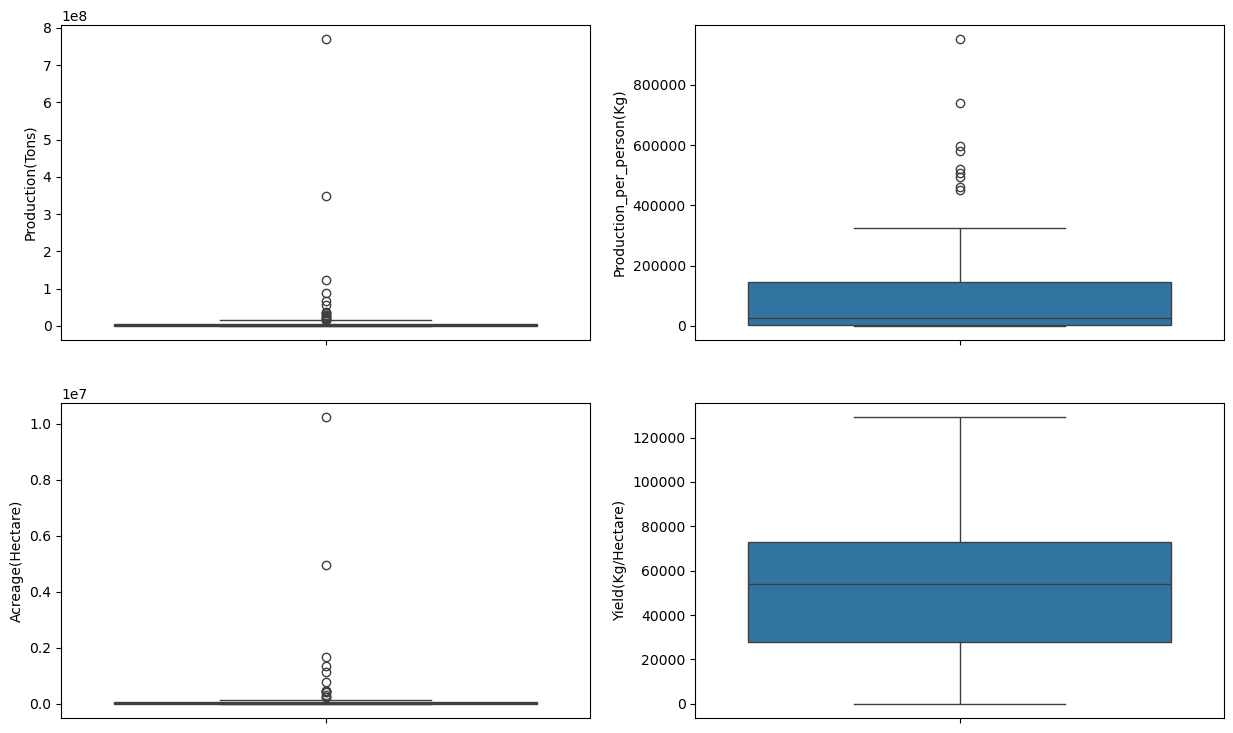

In [22]:
plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
sns.boxplot(data=df,y=df['Production(Tons)'])
plt.subplot(2,2,2)
sns.boxplot(data=df,y=df['Production_per_person(Kg)'])
plt.subplot(2,2,3)
sns.boxplot(data=df,y=df['Acreage(Hectare)'])
plt.subplot(2,2,4)
sns.boxplot(data=df,y=df['Yield(Kg/Hectare)'])
plt.show()

In [23]:
df.describe()

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.030000e+02,103.000000,1.030000e+02,103.000000
mean,1.832407e+07,111856.305311,2.474719e+05,52117.126214
std,8.379760e+07,176134.928689,1.131684e+06,30794.526102
min,1.000000e+00,0.000000,0.000000e+00,0.000000
25%,4.298850e+04,3364.869000,9.175000e+02,27992.750000
50%,1.422432e+06,25481.000000,1.636500e+04,54039.700000
75%,6.145648e+06,144004.500000,8.001700e+04,73106.300000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


In [24]:
df_new=df[['Country','Production(Tons)']].set_index('Country')


## Bivariate Analysis

In [25]:

df_new['Production(Tons)_percent']=df_new['Production(Tons)']*100/df_new['Production(Tons)'].sum()
df_new

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,768678382.0,4.072728e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Lebanon,97.0,5.139401e-06
Djibouti,53.0,2.808126e-06
Singapore,50.0,2.649176e-06


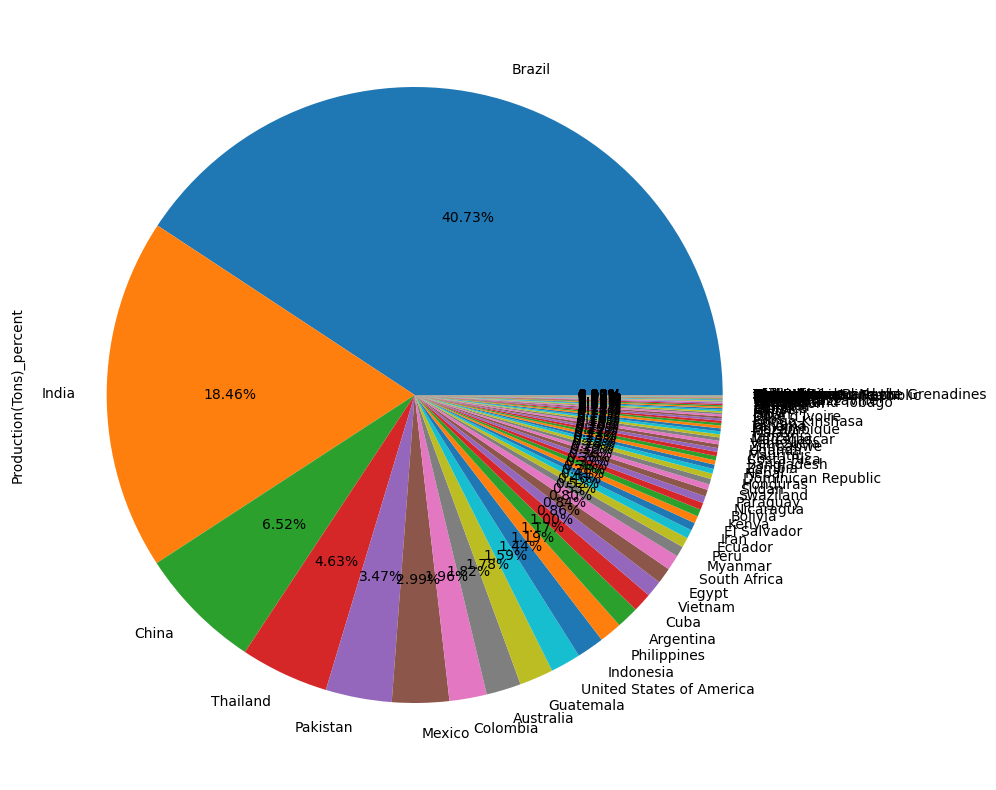

In [26]:
plt.figure(figsize=(10,10))
df_new['Production(Tons)_percent'].plot(kind='pie',autopct='%.2f%%')
plt.show()

In [27]:
df_new['Country_group']=np.where(df_new['Production(Tons)_percent']<2,'Other',df_new.index)
df_new

,Production(Tons),Production(Tons)_percent,Country_group
Country,,,
Brazil,768678382.0,4.072728e+01,Brazil
India,348448000.0,1.846200e+01,India
China,123059739.0,6.520138e+00,China
Thailand,87468496.0,4.634389e+00,Thailand
Pakistan,65450704.0,3.467809e+00,Pakistan
...,...,...,...
Lebanon,97.0,5.139401e-06,Other
Djibouti,53.0,2.808126e-06,Other
Singapore,50.0,2.649176e-06,Other


<Axes: ylabel='Production(Tons)_percent'>

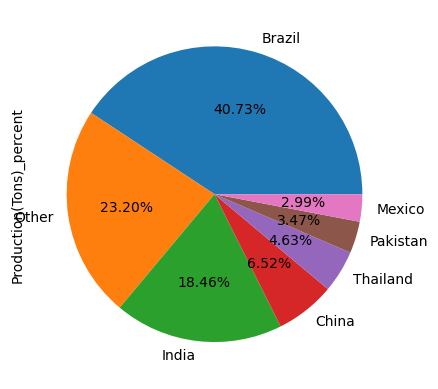

In [28]:
# df_new.groupby('Country_group')['Production(Tons)_percent'].plot(kind='pie',autopct='%.2f%%')
df_new.groupby('Country_group')['Production(Tons)_percent'].sum().sort_values(ascending=False).plot(kind='pie',autopct='%.2f%%')

C:\Users\WELCOME\AppData\Local\Temp\ipykernel_8888\2305998743.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


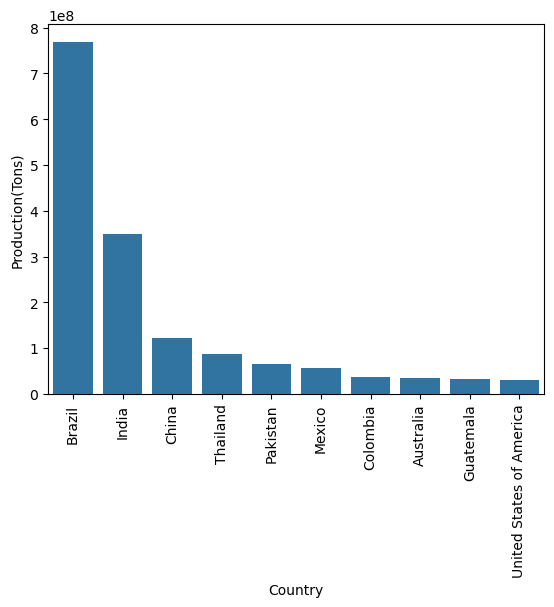

In [29]:
ax=sns.barplot(data=df.head(10),x='Country',y='Production(Tons)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

C:\Users\WELCOME\AppData\Local\Temp\ipykernel_8888\1144373069.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


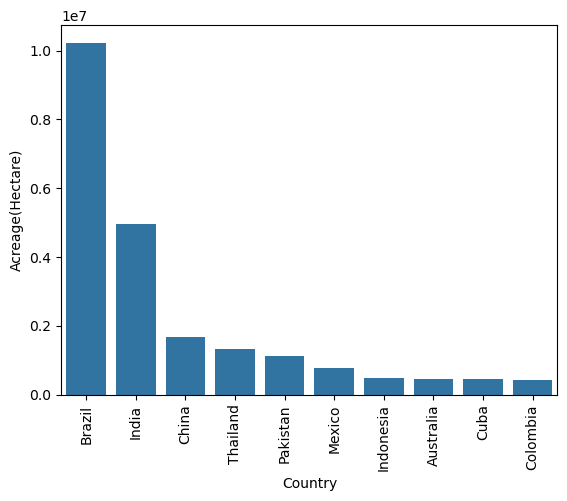

In [30]:

ax=sns.barplot(data=df.sort_values(by='Acreage(Hectare)',ascending=False).head(10),x='Country',y='Acreage(Hectare)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

C:\Users\WELCOME\AppData\Local\Temp\ipykernel_8888\879789373.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


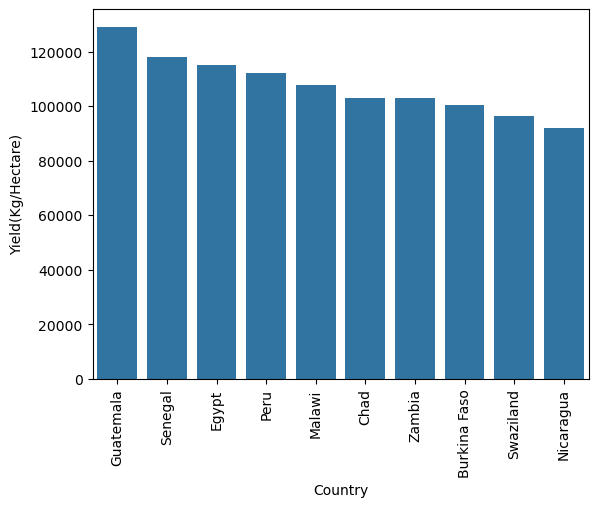

In [31]:
ax=sns.barplot(data=df.sort_values(by='Yield(Kg/Hectare)',ascending=False).head(10),x='Country',y='Yield(Kg/Hectare)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [32]:
df['Production(Tons)'].corr(df['Yield(Kg/Hectare)'])
df['Production(Tons)'].corr(df['Production_per_person(Kg)'])
df['Production(Tons)'].corr(df['Acreage(Hectare)'])


0.9975513208012088

In [33]:
df_=df[['Production(Tons)','Acreage(Hectare)','Yield(Kg/Hectare)','Production_per_person(Kg)']]

In [34]:
df_corr=df_.corr('pearson',numeric_only=True)
df_corr

,Production(Tons),Acreage(Hectare),Yield(Kg/Hectare),Production_per_person(Kg)
Production(Tons),1.000000,0.997551,0.134548,0.016341
Acreage(Hectare),0.997551,1.000000,0.115450,0.013904
Yield(Kg/Hectare),0.134548,0.115450,1.000000,0.028342
Production_per_person(Kg),0.016341,0.013904,0.028342,1.000000


##### DO the Amount of land effect the production

In [35]:
df_corr>0.5 # type: ignore

,Production(Tons),Acreage(Hectare),Yield(Kg/Hectare),Production_per_person(Kg)
Production(Tons),True,True,False,False
Acreage(Hectare),True,True,False,False
Yield(Kg/Hectare),False,False,True,False
Production_per_person(Kg),False,False,False,True


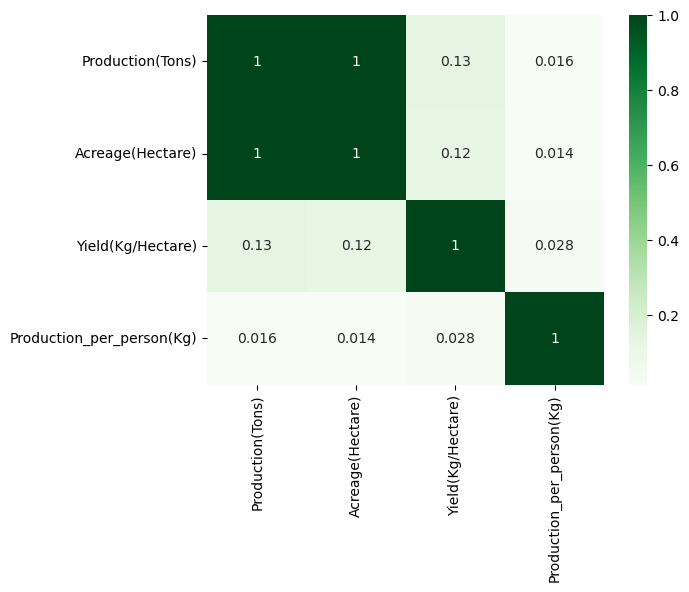

In [36]:
sns.heatmap(df_corr,annot=True,cmap='Greens')
plt.show()

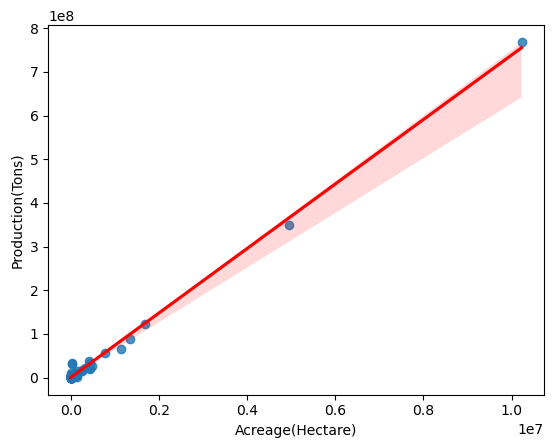

In [37]:
sns.regplot(data=df,y='Production(Tons)',x='Acreage(Hectare)',line_kws={'color':'Red'})
plt.show()

## Analysis for Continent

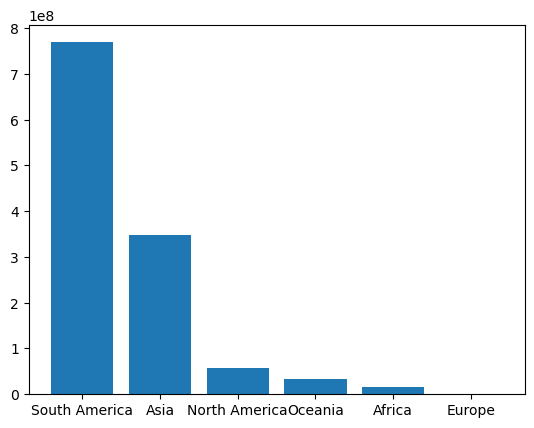

In [38]:
plt.bar(df['Continent'],df['Production(Tons)'])
plt.show()

In [39]:
df_continent=df.groupby('Continent').sum()
df_continent['number_of_countries']=df.groupby('Continent')['Country'].count()
df_continent


,Country,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681525.0,2332687.293,1439089.0,2142107.5,39
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


<Axes: ylabel='Production(Tons)'>

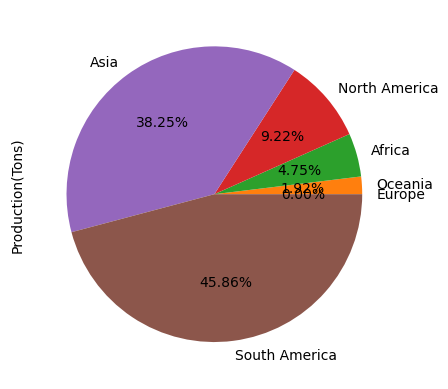

In [40]:
df_continent['Production(Tons)'].sort_values().plot(kind='pie',autopct='%.2f%%')

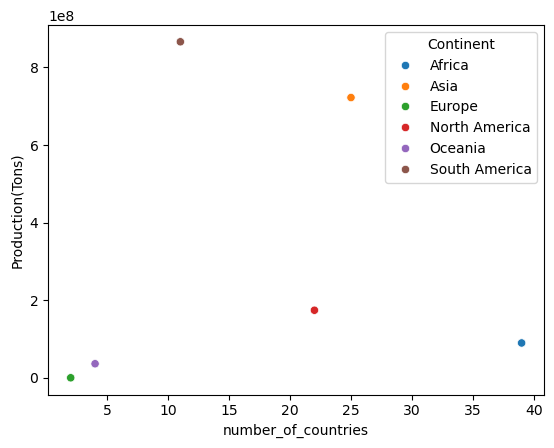

In [41]:
ax=sns.scatterplot(x=df_continent['number_of_countries'],y=df_continent['Production(Tons)'],hue=df_continent.index)
# ax.set_xticklabels(rotation=90,labels=df_continent['number_of_countries'])
plt.show()

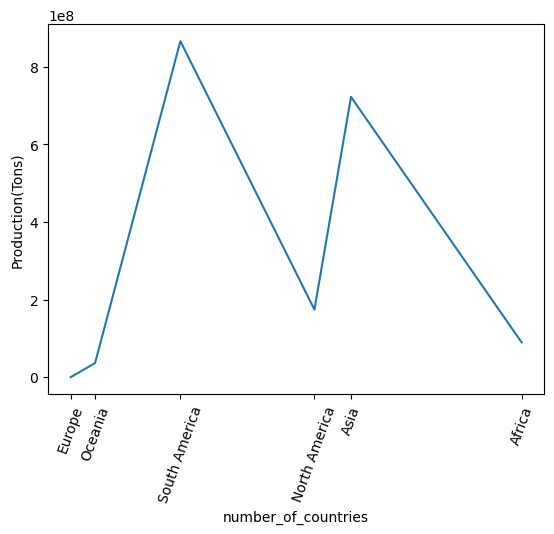

In [42]:
continent_names=(df_continent.index).to_list()

sns.lineplot(data=df_continent,x='number_of_countries',y='Production(Tons)')
plt.xticks(df_continent['number_of_countries'],continent_names,rotation=70)
plt.show()

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

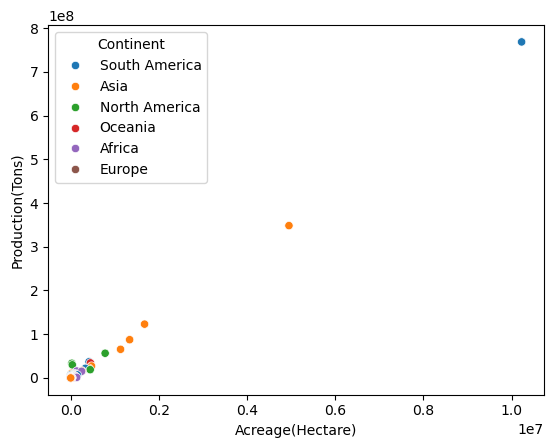

In [43]:
sns.scatterplot(x=df['Acreage(Hectare)'],y=df['Production(Tons)'],hue=df['Continent'])

In [44]:
df_=df_continent[['Production(Tons)','Acreage(Hectare)','Yield(Kg/Hectare)','Production_per_person(Kg)']]

In [45]:
df_corr=df_.corr()
df_corr>0.5

,Production(Tons),Acreage(Hectare),Yield(Kg/Hectare),Production_per_person(Kg)
Production(Tons),True,True,False,True
Acreage(Hectare),True,True,False,False
Yield(Kg/Hectare),False,False,True,True
Production_per_person(Kg),True,False,True,True


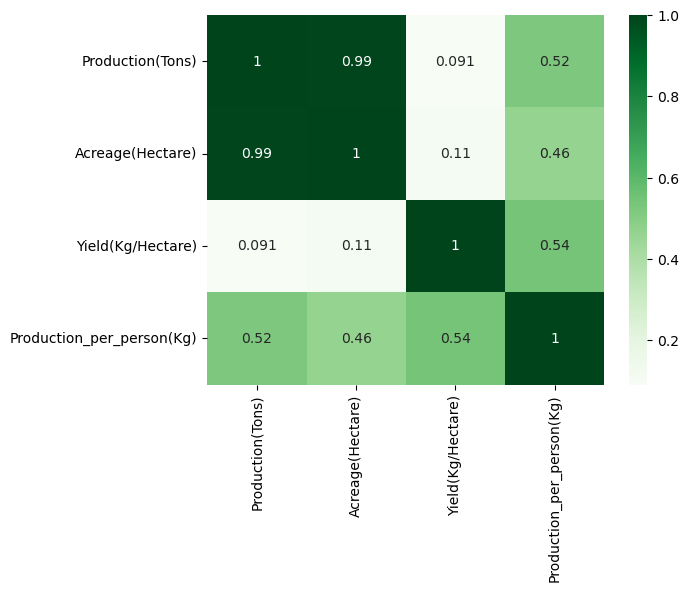

In [46]:
sns.heatmap(df_corr,annot=True,cmap='Greens')
plt.show()